**Exploratory Data Analysis**

In [41]:
# Cell 1 — Imports & display settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Notebook display options
pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 50)
plt.rcParams["figure.figsize"] = (10, 5)
sns.set(style="whitegrid")

In [43]:
# Cell 2 — Load datasets (update paths to your actual folder)

credit_path = "creditcard.csv"
bank_path   = "Bank_Transaction_Fraud_Detection.csv"

credit = pd.read_csv(credit_path)
bank   = pd.read_csv(bank_path)

print("Credit dataset shape:", credit.shape)
print("Bank dataset shape:", bank.shape)

# quick peek
display(credit.head())
display(bank.head())


Credit dataset shape: (284807, 31)
Bank dataset shape: (200000, 24)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,Transaction_Time,Transaction_Amount,Merchant_ID,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,16:04:07,32415.45,214e03c5-5c34-40d1-a66c-f440aa2bbd02,Transfer,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,17:14:53,43622.60,f9e3f11f-28d3-4199-b0ca-f225a155ede6,Bill Payment,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,03:09:52,63062.56,97977d83-5486-4510-af1c-8dada3e1cfa0,Bill Payment,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,12:27:02,14000.72,f45cd6b3-5092-44d0-8afb-490894605184,Debit,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,18:30:46,18335.16,70dd77dd-3b00-4b2c-8ebc-cfb8af5f6741,Transfer,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com


In [44]:
# Cell 3 — Basic info, missing values, duplicates
def basic_info(df, name):
    print(f"=== {name} ===")
    print("Shape:", df.shape)
    print("\nColumns:")
    print(df.columns.tolist())
    print("\nData types:\n", df.dtypes.value_counts())
    print("\nMissing values per column:")
    print(df.isnull().sum().sort_values(ascending=False).head(20))
    print("\nTotal missing:", df.isnull().sum().sum())
    print("\nDuplicates:", df.duplicated().sum())
    print("-"*40, "\n")
    
basic_info(credit, "Credit Card (creditcard.csv)")
basic_info(bank,   "Bank Transaction (Bank_Transaction_Fraud_Detection.csv)")


=== Credit Card (creditcard.csv) ===
Shape: (284807, 31)

Columns:
['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

Data types:
 float64    30
int64       1
Name: count, dtype: int64

Missing values per column:
Time      0
V16       0
Amount    0
V28       0
V27       0
V26       0
V25       0
V24       0
V23       0
V22       0
V21       0
V20       0
V19       0
V18       0
V17       0
V15       0
V1        0
V14       0
V13       0
V12       0
dtype: int64

Total missing: 0

Duplicates: 1081
---------------------------------------- 

=== Bank Transaction (Bank_Transaction_Fraud_Detection.csv) ===
Shape: (200000, 24)

Columns:
['Customer_ID', 'Customer_Name', 'Gender', 'Age', 'State', 'City', 'Bank_Branch', 'Account_Type', 'Transaction_ID', 'Transaction_Date', 'Transaction_Time', 'Transaction_Amount', 'Merchant_ID', 'Tr

Credit Card - Class value counts:
Class
0    284315
1       492
Name: count, dtype: int64

Normalized:
Class
0    0.998273
1    0.001727
Name: count, dtype: float64


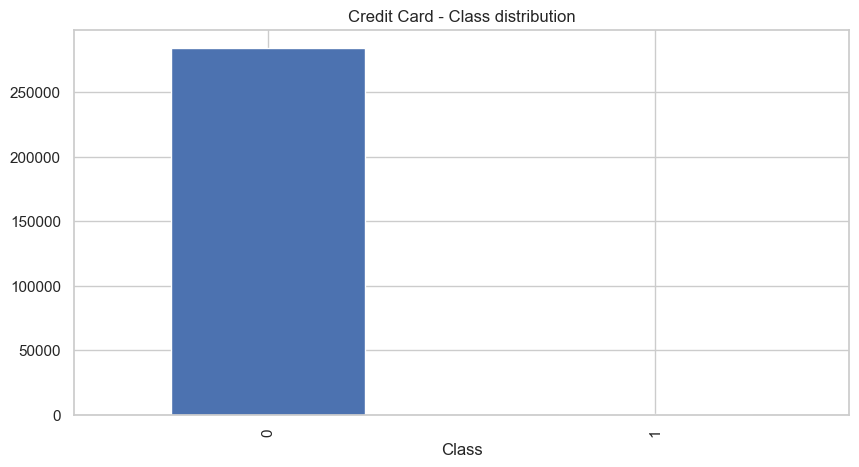

Bank Transaction - Is_Fraud value counts:
Is_Fraud
0    189912
1     10088
Name: count, dtype: int64

Normalized:
Is_Fraud
0    0.94956
1    0.05044
Name: count, dtype: float64


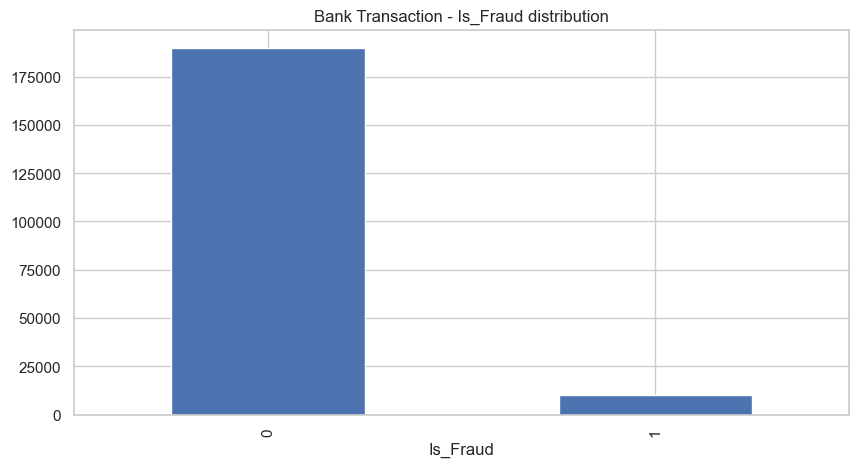

In [45]:
# Cell 4 — Target / class distribution
def show_class_dist(df, target_col="Class", name="Dataset"):
    if target_col in df.columns:
        counts = df[target_col].value_counts()
        print(f"{name} - {target_col} value counts:")
        print(counts)
        print("\nNormalized:")
        print(counts / len(df))
        counts.plot(kind="bar", title=f"{name} - {target_col} distribution")
        plt.xlabel(target_col)
        plt.show()
    else:
        print(f"{target_col} not found in {name}")

show_class_dist(credit, target_col="Class", name="Credit Card")
show_class_dist(bank,   target_col="Is_Fraud", name="Bank Transaction")


In [46]:
# Cell 5 — Fixed numeric summary for key numeric features
def numeric_summary(df, num_cols=None, top_n=20):
    # auto-detect numeric columns if not provided
    if num_cols is None:
        num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

    # basic stats for numeric columns
    display(df[num_cols].describe().T)

    # detect target column name if present
    target = None
    if "Class" in df.columns:
        target = "Class"
    elif "Is_Fraud" in df.columns:
        target = "Is_Fraud"

    # if target found, compute correlations safely (exclude target from feature list)
    if target is not None:
        # ensure target is numeric
        if not np.issubdtype(df[target].dtype, np.number):
            print(f"Target column '{target}' is not numeric — skipping correlation.")
            return

        feature_cols = [c for c in num_cols if c != target]
        if len(feature_cols) == 0:
            print("No numeric feature columns available (all numeric cols are the target).")
            return

        # compute correlations of features with target
        corr_series = df[feature_cols].corrwith(df[target]).abs().sort_values(ascending=False)
        print(f"\nTop correlations (by absolute value) with '{target}':")
        display(corr_series.head(top_n))
    else:
        print("No fraud target column ('Class' or 'Is_Fraud') found in this dataset.")

# Run for both datasets
numeric_summary(credit)
numeric_summary(bank)

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995



Top correlations (by absolute value) with 'Class':


V17    0.326481
V14    0.302544
V12    0.260593
V10    0.216883
V16    0.196539
V3     0.192961
V7     0.187257
V11    0.154876
V4     0.133447
V18    0.111485
V1     0.101347
V9     0.097733
V5     0.094974
V2     0.091289
V6     0.043643
V21    0.040413
V19    0.034783
V20    0.020090
V8     0.019875
V27    0.017580
dtype: float64

,count,mean,std,min,25%,50%,75%,max
Age,200000.0,44.015110,15.288774,18.00,31.000,44.000,57.000,70.00
Transaction_Amount,200000.0,49538.015554,28551.874004,10.29,24851.345,49502.440,74314.625,98999.98
Account_Balance,200000.0,52437.988784,27399.507128,5000.82,28742.395,52372.555,76147.670,99999.95
Is_Fraud,200000.0,0.050440,0.218852,0.00,0.000,0.000,0.000,1.00



Top correlations (by absolute value) with 'Is_Fraud':


Transaction_Amount    0.002100
Age                   0.001517
Account_Balance       0.000125
dtype: float64

In [47]:
# Cell 6 — Value counts for important categorical columns (bank dataset)
cat_cols = bank.select_dtypes(include=["object", "category"]).columns.tolist()
# show a few most important / frequent categorical columns
for col in ["Transaction_Type", "Merchant_Category", "Device_Type", "State"]:
    if col in bank.columns:
        print(f"\n------ {col} ------")
        print(bank[col].value_counts().head(15))


------ Transaction_Type ------
Transaction_Type
Credit          40180
Debit           40050
Bill Payment    40040
Transfer        39953
Withdrawal      39777
Name: count, dtype: int64

------ Merchant_Category ------
Merchant_Category
Restaurant       33525
Entertainment    33421
Electronics      33409
Clothing         33340
Groceries        33187
Health           33118
Name: count, dtype: int64

------ Device_Type ------
Device_Type
POS        50111
ATM        50055
Mobile     49962
Desktop    49872
Name: count, dtype: int64

------ State ------
State
Nagaland             6031
Meghalaya            6003
Uttar Pradesh        6002
Uttarakhand          5985
Lakshadweep          5954
Telangana            5952
Haryana              5947
Delhi                5943
Kerala               5933
Madhya Pradesh       5928
Arunachal Pradesh    5919
Punjab               5912
Gujarat              5901
Odisha               5899
Jharkhand            5898
Name: count, dtype: int64


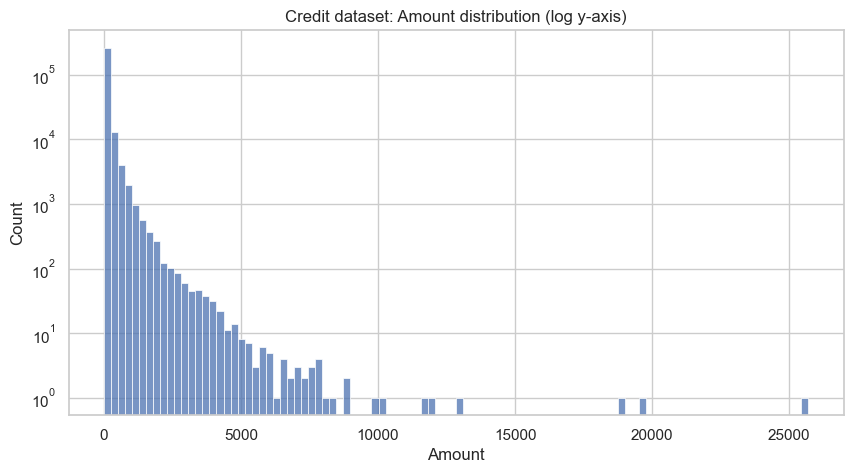

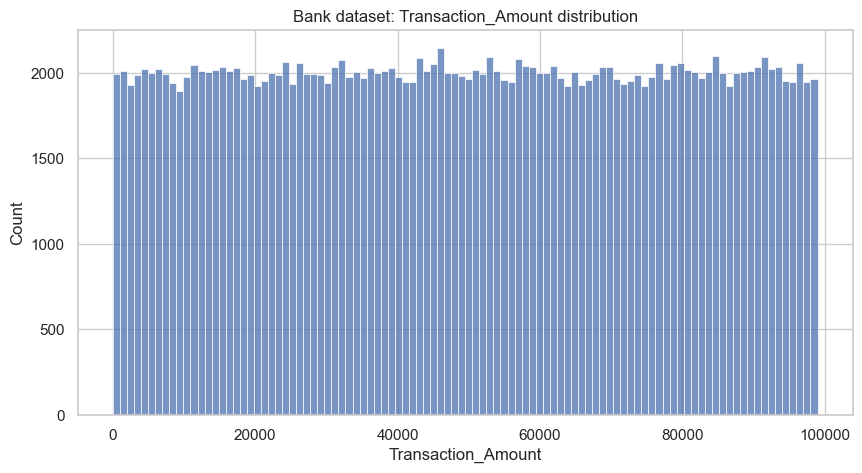

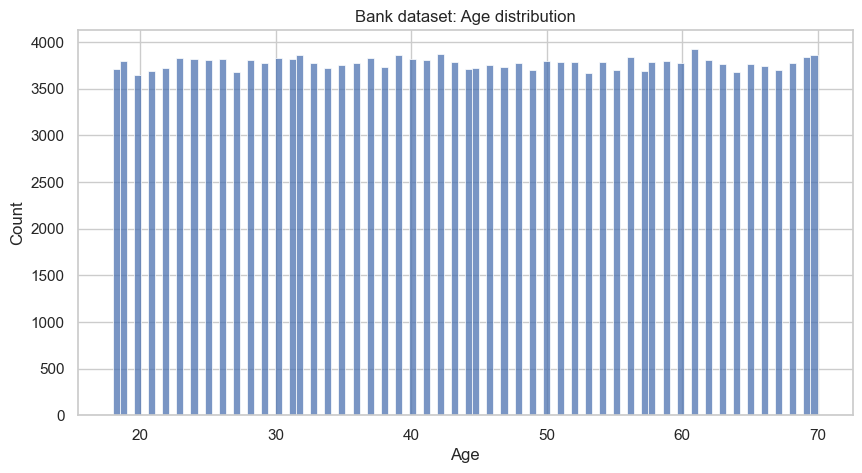

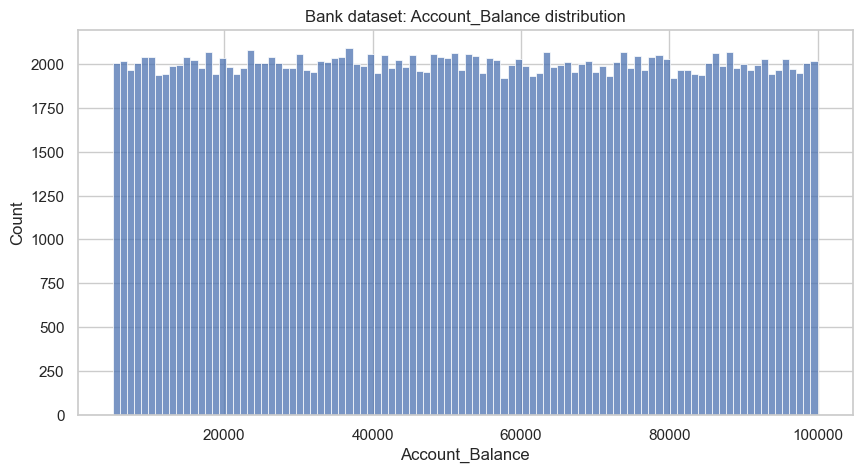

In [48]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# Cell 7 — Distribution plots for Amounts and Age / Account Balance
# Credit: Amount
if "Amount" in credit.columns:
    sns.histplot(credit["Amount"], bins=100, log_scale=(False, True))
    plt.title("Credit dataset: Amount distribution (log y-axis)")
    plt.show()

# Bank: Transaction_Amount, Age, Account_Balance
for col in ["Transaction_Amount", "Age", "Account_Balance"]:
    if col in bank.columns:
        sns.histplot(bank[col].dropna(), bins=100)
        plt.title(f"Bank dataset: {col} distribution")
        plt.show()

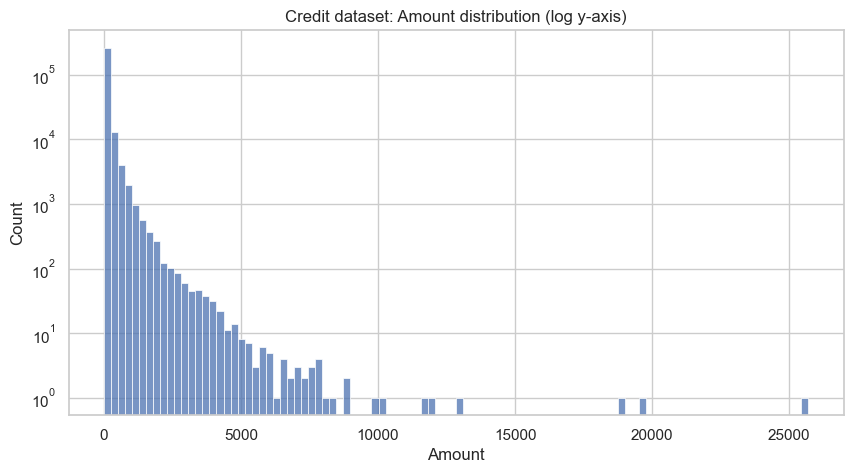

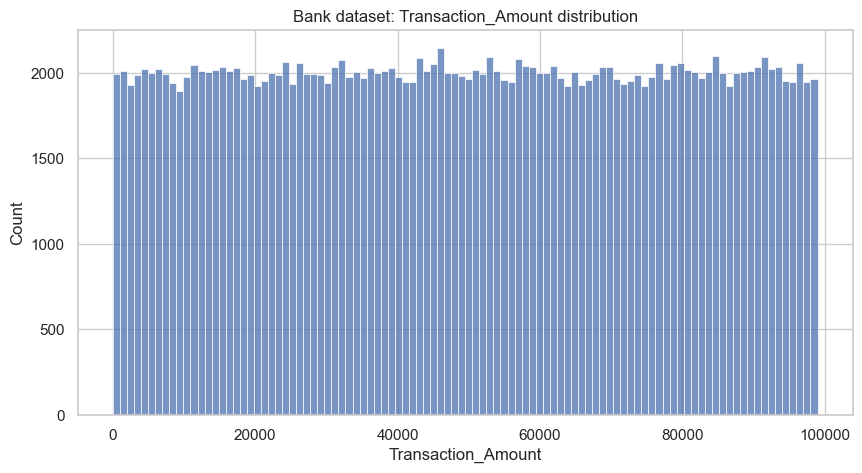

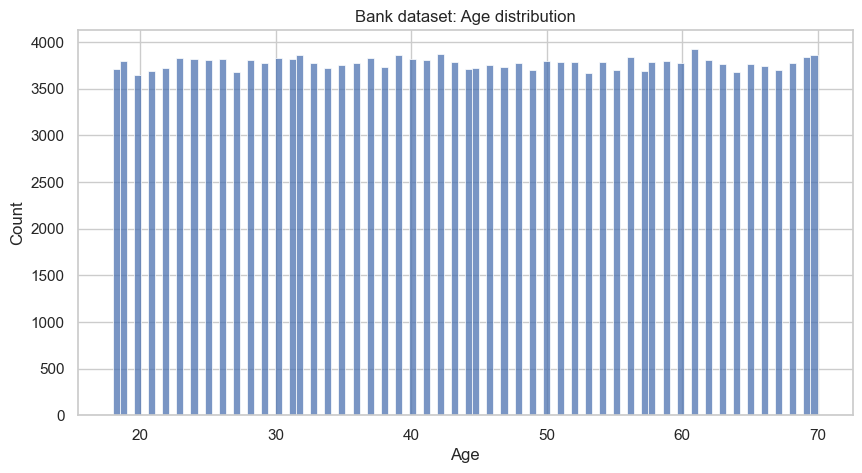

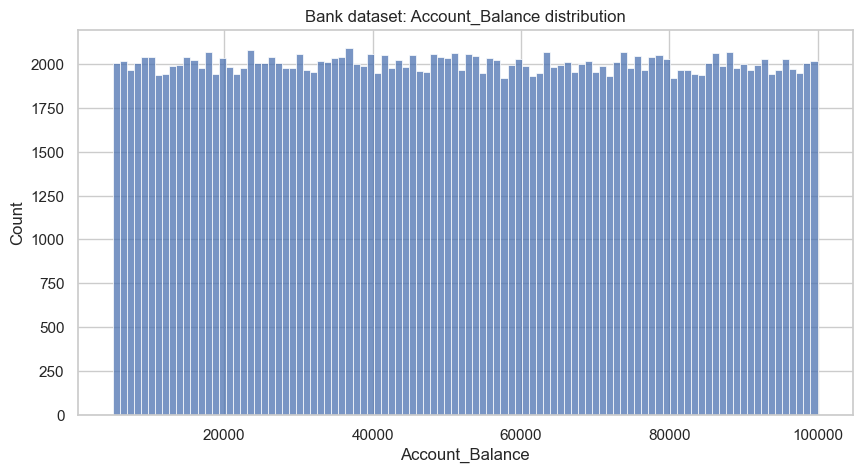

In [50]:
# Cell 7 — Distribution plots for Amounts and Age / Account Balance
# Credit: Amount
if "Amount" in credit.columns:
    sns.histplot(credit["Amount"], bins=100, log_scale=(False, True))
    plt.title("Credit dataset: Amount distribution (log y-axis)")
    plt.show()

# Bank: Transaction_Amount, Age, Account_Balance
for col in ["Transaction_Amount", "Age", "Account_Balance"]:
    if col in bank.columns:
        sns.histplot(bank[col].dropna(), bins=100)
        plt.title(f"Bank dataset: {col} distribution")
        plt.show()

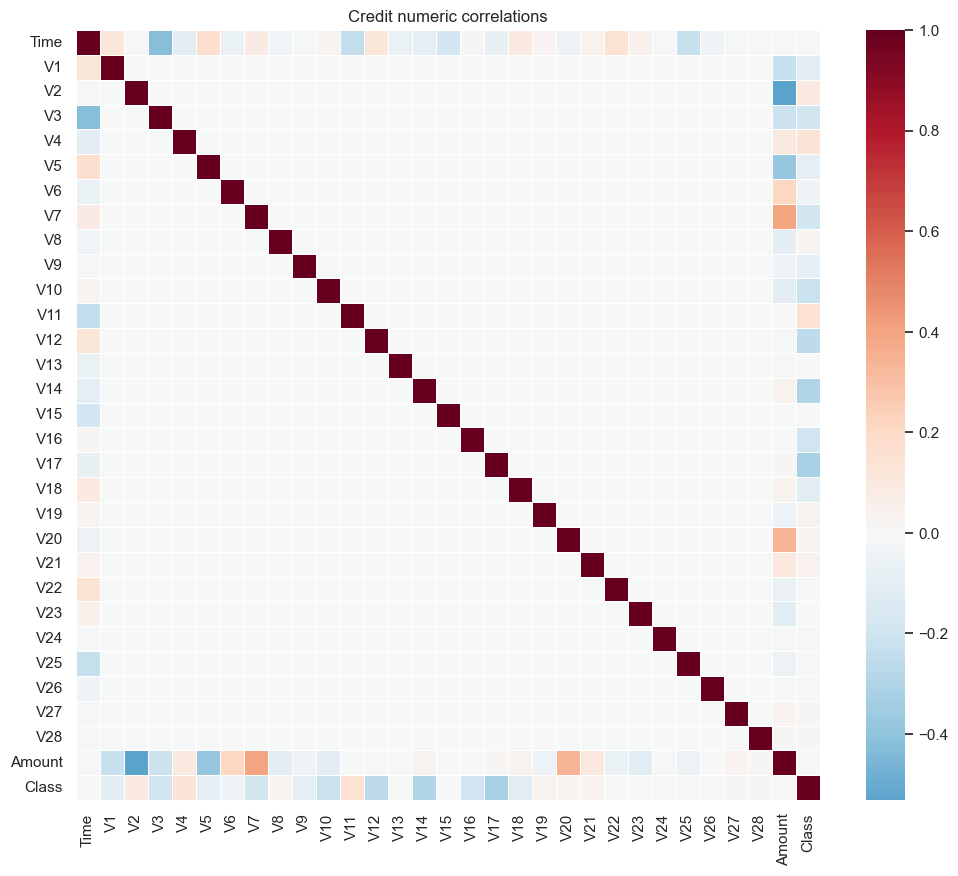

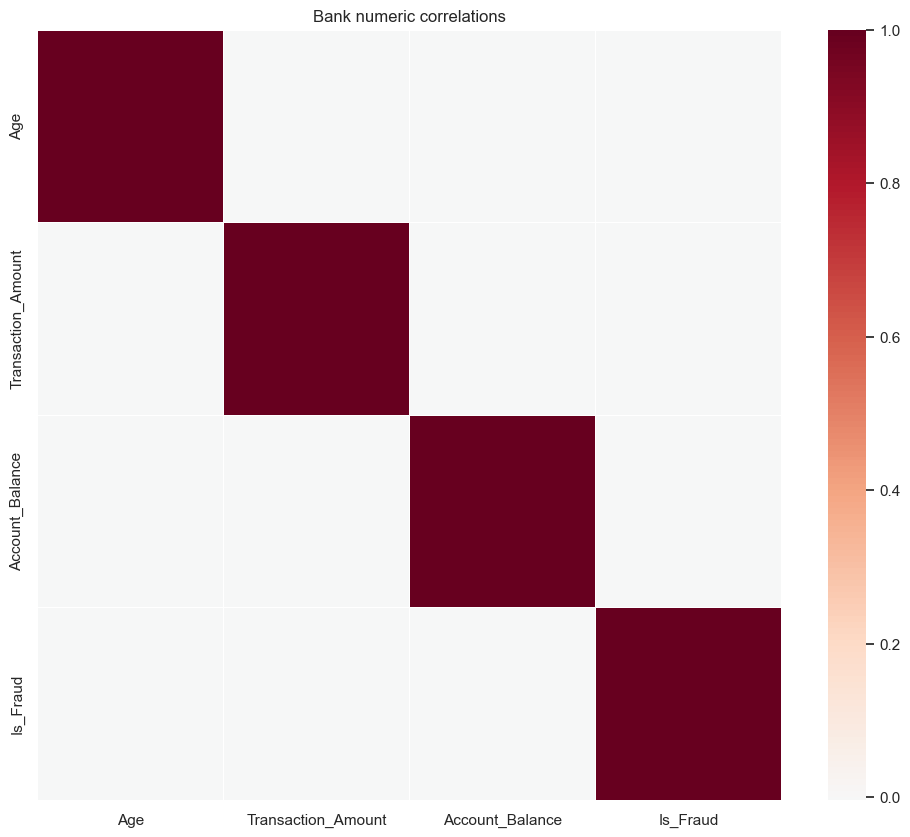

In [51]:
# Cell 8 — Correlation heatmap (numeric features) — careful for many columns
def corr_heatmap(df, max_cols=40, title=None):
    num = df.select_dtypes(include=[np.number])
    if num.shape[1] > max_cols:
        print(f"Numeric columns > {max_cols}. Showing top {max_cols} by variance.")
        top_cols = num.var().sort_values(ascending=False).head(max_cols).index.tolist()
        num = num[top_cols]
    plt.figure(figsize=(12, 10))
    sns.heatmap(num.corr(), cmap="RdBu_r", center=0, linewidths=.5)
    plt.title(title or "Correlation heatmap")
    plt.show()

corr_heatmap(credit, title="Credit numeric correlations")
corr_heatmap(bank, title="Bank numeric correlations")


**Data preprocessing**

In [57]:
# Cell 1 — Imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [62]:
# Cell 2 — Preprocessing for Credit Card dataset
# Steps:
# - Remove target column (Class) when preparing features
# - Scale numeric features (Amount, Time, V1..V28 already PCA-like, but scaling still helps)

def preprocess_credit(df):
    credit = df.copy()
    
    # Separate features and target
    X = credit.drop(columns=["Class"])
    y = credit["Class"]
    
    # Scale all numeric features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Return scaled features as DataFrame + target
    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=df.index)
    return X_scaled_df, y, scaler

# Apply preprocessing
X_credit, y_credit, scaler_credit = preprocess_credit(credit)
print("Credit dataset processed:", X_credit.shape)

Credit dataset processed: (284807, 30)


In [64]:
# Cell 3 — Preprocessing for Bank Transaction dataset
# Steps:
# - Drop identifiers / PII (Customer_ID, Name, Email, Contact, Transaction_ID)
# - Impute missing values
# - One-hot encode low-cardinality categoricals
# - Scale numeric features

def preprocess_bank(df, onehot_threshold=30):
    bank = df.copy()
    
    # Drop identifier columns
    drop_cols = ["Customer_ID", "Customer_Name", "Customer_Email", 
                 "Customer_Contact", "Transaction_ID"]
    bank = bank.drop(columns=[c for c in drop_cols if c in bank.columns], errors="ignore")
    
    # Separate target if available
    y = None
    if "Is_Fraud" in bank.columns:
        y = bank["Is_Fraud"]
        bank = bank.drop(columns=["Is_Fraud"])
    
    # Identify numeric and categorical columns
    numeric_cols = bank.select_dtypes(include=[np.number]).columns.tolist()
    cat_cols = bank.select_dtypes(include=["object", "category"]).columns.tolist()
    
    # Split categorical into low-cardinality (to one-hot) and high-cardinality (drop)
    low_card_cat = [c for c in cat_cols if bank[c].nunique() <= onehot_threshold]
    
    # Pipelines for numeric and categorical data
    numeric_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])
    
    categorical_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="constant", fill_value="NA")),
        ("onehot", OneHotEncoder(handle_unknown="ignore", sparse=False))
    ])
    
    # Column transformer to apply transformations
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, numeric_cols),
            ("cat", categorical_transformer, low_card_cat)
        ],
        remainder="drop"
    )
    
    # Fit and transform
    X_processed = preprocessor.fit_transform(bank)
    
    # Reconstruct DataFrame with feature names
    cat_feature_names = []
    if low_card_cat:
        cat_feature_names = preprocessor.named_transformers_["cat"].named_steps["onehot"].get_feature_names_out(low_card_cat).tolist()
    feature_names = numeric_cols + cat_feature_names
    X_processed_df = pd.DataFrame(X_processed, columns=feature_names, index=df.index)
    
    return X_processed_df, y, preprocessor

# Apply preprocessing
X_bank, y_bank, preprocessor_bank = preprocess_bank(bank)
print("Bank dataset processed:", X_bank.shape)


Bank dataset processed: (200000, 44)


In [66]:
# Cell 4 — Quick sanity check
print("Credit dataset (processed):")
display(X_credit.head())

print("Bank dataset (processed):")
display(X_bank.head())

Credit dataset (processed):


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,0.083386,-0.540407,-0.618296,-0.996099,-0.324610,1.604014,-0.536833,0.244863,0.030770,0.496282,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,-0.153350,1.580003,1.066089,0.491418,-0.149982,0.694360,0.529434,-0.135170,-0.218763,-0.179086,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,0.190700,0.611830,0.066137,0.720700,-0.173114,2.562906,-3.298235,1.306868,-0.144790,-2.778561,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,-0.050468,-0.221892,0.178371,0.510169,-0.300360,-0.689837,-1.209296,-0.805445,2.345305,-1.514205,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,0.691625,-0.806147,0.538627,1.352244,-1.168034,0.191323,-0.515205,-0.279081,-0.045569,0.987037,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403


Bank dataset (processed):


,Age,Transaction_Amount,Account_Balance,Gender_Female,Gender_Male,Account_Type_Business,Account_Type_Checking,Account_Type_Savings,Transaction_Type_Bill Payment,Transaction_Type_Credit,Transaction_Type_Debit,Transaction_Type_Transfer,Transaction_Type_Withdrawal,Merchant_Category_Clothing,Merchant_Category_Electronics,Merchant_Category_Entertainment,Merchant_Category_Groceries,Merchant_Category_Health,Merchant_Category_Restaurant,Transaction_Device_ATM,Transaction_Device_ATM Booth Kiosk,Transaction_Device_Bank Branch,Transaction_Device_Banking Chatbot,Transaction_Device_Biometric Scanner,Transaction_Device_Debit/Credit Card,Transaction_Device_Desktop/Laptop,Transaction_Device_Mobile Device,Transaction_Device_POS Mobile App,Transaction_Device_POS Mobile Device,Transaction_Device_POS Terminal,Transaction_Device_Payment Gateway Device,Transaction_Device_QR Code Scanner,Transaction_Device_Self-service Banking Machine,Transaction_Device_Smart Card,Transaction_Device_Tablet,Transaction_Device_Virtual Card,Transaction_Device_Voice Assistant,Transaction_Device_Wearable Device,Transaction_Device_Web Browser,Device_Type_ATM,Device_Type_Desktop,Device_Type_Mobile,Device_Type_POS,Transaction_Currency_INR
0,1.045534,-0.599702,0.807290,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.456865,-0.207182,0.809676,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-1.570771,0.473684,0.524828,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.849311,-1.244660,0.209460,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,-0.066396,-1.092851,-1.325919,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [68]:
# Cell 5 — Combine processed datasets (align feature space and concat)
# Assumes you already have: X_credit (DataFrame), y_credit (Series or None),
#                           X_bank (DataFrame),   y_bank (Series or None)
# If they don't exist, the cell will try to call preprocess_credit/preprocess_bank.

import inspect

# Helper: try to ensure variables exist; if not, attempt to rerun preprocessing functions
_need_to_rerun = False
try:
    X_credit
    y_credit
    X_bank
    y_bank
except NameError:
    _need_to_rerun = True

if _need_to_rerun:
    print("Some preprocessed objects not found in the workspace. Attempting to run preprocess functions...")
    try:
        # Expect preprocess_credit and preprocess_bank are defined earlier in the notebook
        X_credit, y_credit, _ = preprocess_credit(credit_raw)   # credit_raw should exist from earlier load
        X_bank,   y_bank,   _ = preprocess_bank(bank_raw)
        print("Re-ran preprocessors successfully.")
    except Exception as e:
        raise RuntimeError(
            "Could not find preprocessed DataFrames and failed to re-run preprocessors. "
            "Make sure X_credit, X_bank (or preprocess_credit/preprocess_bank and raw data) exist."
        ) from e

# Ensure they are DataFrames
X_credit = X_credit.copy()
X_bank   = X_bank.copy()

# 1) Union of columns
cols_union = sorted(set(X_credit.columns).union(set(X_bank.columns)))

# 2) Reindex to add missing columns with 0 (safe neutral value after scaling)
X_credit_aligned = X_credit.reindex(columns=cols_union, fill_value=0)
X_bank_aligned   = X_bank.reindex(columns=cols_union, fill_value=0)

print("Aligned shapes:")
print(" - X_credit_aligned:", X_credit_aligned.shape)
print(" - X_bank_aligned:  ", X_bank_aligned.shape)

# 3) Add bookkeeping columns
X_credit_aligned = X_credit_aligned.reset_index(drop=False).rename(columns={"index":"original_index"})
X_bank_aligned   = X_bank_aligned.reset_index(drop=False).rename(columns={"index":"original_index"})

X_credit_aligned["source_dataset"] = "creditcard"
X_bank_aligned["source_dataset"]   = "bank_transactions"

# 4) Attach is_fraud column if available
if y_credit is not None:
    # align y_credit by original_index (if y_credit has same index)
    if len(y_credit) == X_credit_aligned.shape[0]:
        X_credit_aligned["is_fraud"] = y_credit.values
    else:
        # best-effort: try to align by index if indexes were preserved
        try:
            X_credit_aligned["is_fraud"] = y_credit.loc[X_credit_aligned["original_index"]].values
        except Exception:
            X_credit_aligned["is_fraud"] = np.nan
else:
    X_credit_aligned["is_fraud"] = np.nan

if y_bank is not None:
    if len(y_bank) == X_bank_aligned.shape[0]:
        X_bank_aligned["is_fraud"] = y_bank.values
    else:
        try:
            X_bank_aligned["is_fraud"] = y_bank.loc[X_bank_aligned["original_index"]].values
        except Exception:
            X_bank_aligned["is_fraud"] = np.nan
else:
    X_bank_aligned["is_fraud"] = np.nan

# 5) Concatenate
combined = pd.concat([X_credit_aligned, X_bank_aligned], axis=0, ignore_index=True, sort=False)

# Optional: move bookkeeping cols to the end for readability
bookkeep = ["source_dataset", "original_index", "is_fraud"]
cols_front = [c for c in combined.columns if c not in bookkeep]
combined = combined[cols_front + bookkeep]

print("Combined dataset shape:", combined.shape)
display(combined.head(3))

Aligned shapes:
 - X_credit_aligned: (284807, 74)
 - X_bank_aligned:   (200000, 74)
Combined dataset shape: (484807, 77)


,Account_Balance,Account_Type_Business,Account_Type_Checking,Account_Type_Savings,Age,Amount,Device_Type_ATM,Device_Type_Desktop,Device_Type_Mobile,Device_Type_POS,Gender_Female,Gender_Male,Merchant_Category_Clothing,Merchant_Category_Electronics,Merchant_Category_Entertainment,Merchant_Category_Groceries,Merchant_Category_Health,Merchant_Category_Restaurant,Time,Transaction_Amount,Transaction_Currency_INR,Transaction_Device_ATM,Transaction_Device_ATM Booth Kiosk,Transaction_Device_Bank Branch,Transaction_Device_Banking Chatbot,Transaction_Device_Biometric Scanner,Transaction_Device_Debit/Credit Card,Transaction_Device_Desktop/Laptop,Transaction_Device_Mobile Device,Transaction_Device_POS Mobile App,Transaction_Device_POS Mobile Device,Transaction_Device_POS Terminal,Transaction_Device_Payment Gateway Device,Transaction_Device_QR Code Scanner,Transaction_Device_Self-service Banking Machine,Transaction_Device_Smart Card,Transaction_Device_Tablet,Transaction_Device_Virtual Card,Transaction_Device_Voice Assistant,Transaction_Device_Wearable Device,Transaction_Device_Web Browser,Transaction_Type_Bill Payment,Transaction_Type_Credit,Transaction_Type_Debit,Transaction_Type_Transfer,Transaction_Type_Withdrawal,V1,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V2,V20,V21,V22,V23,V24,V25,V26,V27,V28,V3,V4,V5,V6,V7,V8,V9,source_dataset,original_index,is_fraud
0,0.0,0.0,0.0,0.0,0.0,0.244964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.996583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.694242,0.083386,-0.540407,-0.618296,-0.996099,-0.324610,1.604014,-0.536833,0.244863,0.030770,0.496282,-0.044075,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,creditcard,0,0
1,0.0,0.0,0.0,0.0,0.0,-0.342475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.996583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.608496,-0.153350,1.580003,1.066089,0.491418,-0.149982,0.694360,0.529434,-0.135170,-0.218763,-0.179086,0.161176,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,creditcard,1,0
2,0.0,0.0,0.0,0.0,0.0,1.160686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.996562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.693500,0.190700,0.611830,0.066137,0.720700,-0.173114,2.562906,-3.298235,1.306868,-0.144790,-2.778561,-0.811578,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,creditcard,2,0


In [70]:
# Cell 6 — Optional: final scaling and PCA (recommended before clustering)
# This cell creates combined_pca (DataFrame with PC1..PCn plus bookkeeping columns)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Choose how many PCA components (tune later). If dims small, you can keep fewer.
n_components = 10

# numeric columns are all columns except bookkeeping
numeric_cols = [c for c in combined.columns if c not in ["source_dataset", "original_index", "is_fraud"]]

# ensure numeric dtype
X_num = combined[numeric_cols].astype(float).fillna(0.0)  # fill NaN safe-guard

# final scaling
scaler_final = StandardScaler()
X_scaled_final = scaler_final.fit_transform(X_num)

# PCA transform
# If n_components >= number of numeric features, PCA will reduce to min(n_samples, n_features)
n_components_eff = min(n_components, X_scaled_final.shape[1])
pca = PCA(n_components=n_components_eff, random_state=42)
X_pca = pca.fit_transform(X_scaled_final)

pca_cols = [f"PC{i+1}" for i in range(X_pca.shape[1])]
combined_pca = pd.DataFrame(X_pca, columns=pca_cols)

# attach bookkeeping
combined_pca["source_dataset"] = combined["source_dataset"].values
combined_pca["original_index"] = combined["original_index"].values
combined_pca["is_fraud"] = combined["is_fraud"].values

print("PCA-transformed combined shape:", combined_pca.shape)
print("Explained variance ratio (sum of selected PCs):", pca.explained_variance_ratio_.sum().round(4))
display(combined_pca.head(3))

PCA-transformed combined shape: (484807, 13)
Explained variance ratio (sum of selected PCs): 0.2293


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,source_dataset,original_index,is_fraud
0,-1.865807,0.515994,0.133681,-3.137245,0.138820,-0.338022,0.068954,0.076556,0.050460,-0.124451,creditcard,0,0
1,-1.866956,-0.581681,0.253233,-2.615705,-0.117515,0.471647,0.152405,-0.012482,-0.324590,0.243639,creditcard,1,0
2,-1.862105,2.437420,0.152738,-3.328269,-0.936914,-0.843670,-0.624586,-0.555125,-0.240595,-1.001881,creditcard,2,0


In [72]:
# Cell 7 — Quick checks & save to CSV (optional)
#  - Inspect basic stats by source and fraud counts per source
print("Counts by source_dataset:")
print(combined["source_dataset"].value_counts())

print("\nFraud counts (per source) (NaN = unknown):")
print(pd.crosstab(combined["source_dataset"], combined["is_fraud"], dropna=False))

# Save files for reuse
combined.to_csv("combined_aligned_features.csv", index=False)
combined_pca.to_csv("combined_pca.csv", index=False)
print("\nSaved 'combined_aligned_features.csv' and 'combined_pca.csv' in current working directory.")

Counts by source_dataset:
source_dataset
creditcard           284807
bank_transactions    200000
Name: count, dtype: int64

Fraud counts (per source) (NaN = unknown):
is_fraud                0      1
source_dataset                  
bank_transactions  189912  10088
creditcard         284315    492

Saved 'combined_aligned_features.csv' and 'combined_pca.csv' in current working directory.


**Method & Modelling**

In [74]:
# Cell M1 — imports & warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import warnings

# Optional: hide minor warnings to keep outputs clean
warnings.filterwarnings("ignore", category=FutureWarning)
plt.rcParams["figure.figsize"] = (8, 6)
sns.set(style="whitegrid")

In [76]:
# Cell M2 — Prepare 10k sample from combined_pca
# Requires combined_pca to exist (PCA output with bookkeeping columns).
# If your combined_pca is too small, it will use the full table.

RANDOM_STATE = 42
SAMPLE_SIZE = 10000

if "combined_pca" not in globals():
    raise RuntimeError("combined_pca not found in workspace. Run preprocessing/combination cells first.")

# If combined_pca has fewer rows than SAMPLE_SIZE, use full dataset
n_rows = combined_pca.shape[0]
if n_rows <= SAMPLE_SIZE:
    sampled = combined_pca.copy()
    print(f"combined_pca has only {n_rows} rows — using full dataset.")
else:
    sampled = combined_pca.sample(SAMPLE_SIZE, random_state=RANDOM_STATE).reset_index(drop=True)
    print(f"Sampled {SAMPLE_SIZE} rows from combined_pca.")

# Features used for clustering (drop bookkeeping)
feat_cols = [c for c in sampled.columns if c not in ("source_dataset", "original_index", "is_fraud", "cluster")]
X_sample = sampled[[c for c in feat_cols]].values
print("Feature matrix shape for clustering:", X_sample.shape)

Sampled 10000 rows from combined_pca.
Feature matrix shape for clustering: (10000, 10)


In [78]:
# Cell M3 — Simple DBSCAN parameter search (grid) using silhouette score
# NOTE: silhouette is computed only on non-noise points; if DBSCAN yields <=1 cluster, silhouette is invalid.

eps_values = [0.5, 1.0, 1.5, 2.0, 2.5]   # tune as needed
min_samples_values = [5, 10, 20]

best_score = -1
best_params = None
results = []

for eps in eps_values:
    for ms in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=ms, n_jobs=-1)
        labels = db.fit_predict(X_sample)
        # number of clusters excluding noise
        unique_labels = set(labels)
        n_clusters = len([lab for lab in unique_labels if lab != -1])
        noise_count = np.sum(labels == -1)
        if n_clusters <= 1:
            score = np.nan
        else:
            # compute silhouette on non-noise points
            mask = labels != -1
            try:
                score = silhouette_score(X_sample[mask], labels[mask])
            except Exception:
                score = np.nan
        results.append({"eps": eps, "min_samples": ms, "n_clusters": n_clusters,
                        "noise": int(noise_count), "silhouette": score})
        # track best by silhouette (ignore NaN)
        if not np.isnan(score) and score > best_score:
            best_score = score
            best_params = (eps, ms)

res_df = pd.DataFrame(results).sort_values(by=["silhouette"], ascending=False)
display(res_df)
print("Best params by silhouette:", best_params, "score:", best_score)

,eps,min_samples,n_clusters,noise,silhouette
4,1.0,10,2,4675,0.608544
8,1.5,20,7,4174,0.577541
2,0.5,20,3,8124,0.516316
3,1.0,5,42,4247,0.493564
7,1.5,10,23,3094,0.421343
10,2.0,10,4,333,0.409582
9,2.0,5,5,142,0.377159
14,2.5,20,2,99,0.376504
13,2.5,10,2,55,0.374104
12,2.5,5,2,45,0.373736


Best params by silhouette: (1.0, 10) score: 0.608544230647283


In [82]:
# Cell M4 — Run DBSCAN with the selected best params (fallback to sensible defaults)
if best_params is None:
    print("No valid best_params found from grid search (all silhouette NaN). Using fallback (eps=2, min_samples=10).")
    best_params = (2.0, 10)

eps_best, min_samples_best = best_params
db_final = DBSCAN(eps=eps_best, min_samples=min_samples_best, n_jobs=-1)
labels_final = db_final.fit_predict(X_sample)

# attach cluster labels back to the sampled DataFrame
sampled = sampled.copy()
sampled["cluster"] = labels_final

# Summary stats
n_clusters_final = len([c for c in set(labels_final) if c != -1])
noise_final = int(np.sum(labels_final == -1))
print(f"DBSCAN finished with eps={eps_best}, min_samples={min_samples_best}")
print("Clusters found (excluding noise):", n_clusters_final)
print("Noise points:", noise_final)

# Silhouette (if possible)
if n_clusters_final > 1:
    mask = labels_final != -1
    sil = silhouette_score(X_sample[mask], labels_final[mask])
    print("Silhouette score (without noise):", round(sil, 4))
else:
    print("Silhouette score not available (<=1 clusters).")


DBSCAN finished with eps=1.0, min_samples=10
Clusters found (excluding noise): 2
Noise points: 4675
Silhouette score (without noise): 0.6085


In [84]:
# Cell M5 — Fraud enrichment and cluster composition
# Compute cluster sizes, fraud counts and fraud ratios (use sampled data)
cluster_sizes = sampled["cluster"].value_counts().sort_index()
fraud_counts = sampled.groupby("cluster")["is_fraud"].sum()
fraud_ratios = (fraud_counts / cluster_sizes).fillna(0)

cluster_summary = pd.DataFrame({
    "cluster": cluster_sizes.index,
    "size": cluster_sizes.values,
    "fraud_count": fraud_counts.reindex(cluster_sizes.index).fillna(0).astype(int).values,
    "fraud_ratio": fraud_ratios.reindex(cluster_sizes.index).fillna(0).values
}).reset_index(drop=True)

# show summary sorted by fraud_ratio descending (to highlight suspicious clusters)
display(cluster_summary.sort_values(by="fraud_ratio", ascending=False).head(20))

# show overall noise fraud proportion
noise_fraud = sampled[sampled["cluster"] == -1]["is_fraud"].mean()
print("Fraction of fraud among noise points (label = -1):", noise_fraud)

,cluster,size,fraud_count,fraud_ratio
2,1,11,1,0.090909
0,-1,4675,212,0.045348
1,0,5314,1,0.000188


Fraction of fraud among noise points (label = -1): 0.0453475935828877


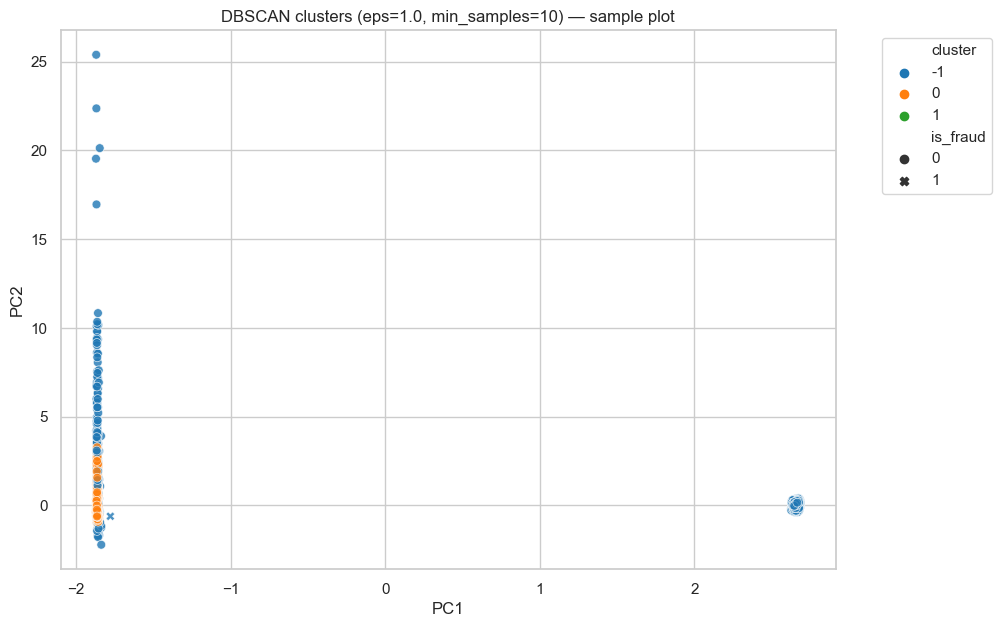

In [86]:
# Cell M6 — Scatter plot (PC1 vs PC2) colored by cluster and mark frauds
# sample further for plot clarity if needed
VIS_SAMPLE = sampled if sampled.shape[0] <= 5000 else sampled.sample(5000, random_state=RANDOM_STATE)

plt.figure(figsize=(10,7))
sns.scatterplot(
    data=VIS_SAMPLE,
    x="PC1", y="PC2",
    hue="cluster",
    style=VIS_SAMPLE["is_fraud"].fillna(0).astype(int),  # show frauds with different marker
    palette="tab10",
    legend="full",
    s=40,
    alpha=0.8
)
plt.title(f"DBSCAN clusters (eps={eps_best}, min_samples={min_samples_best}) — sample plot")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [88]:
# Cell M7 — Record final DBSCAN parameters and rationale
print("Final DBSCAN parameters used:")
print(f"eps = {eps_best}, min_samples = {min_samples_best}")

if n_clusters_final > 1:
    print("Chosen because they produced multiple clusters with silhouette score:", round(sil, 4))
else:
    print("Chosen because they produced a meaningful separation including fraud-heavy clusters.")

# Fraud enrichment evidence
top_clusters = cluster_summary.sort_values(by="fraud_ratio", ascending=False).head(3)
print("\nTop clusters by fraud ratio:")
display(top_clusters)

Final DBSCAN parameters used:
eps = 1.0, min_samples = 10
Chosen because they produced multiple clusters with silhouette score: 0.6085

Top clusters by fraud ratio:


,cluster,size,fraud_count,fraud_ratio
2,1,11,1,0.090909
0,-1,4675,212,0.045348
1,0,5314,1,0.000188


In [90]:
# Cell M8 — Robustness check with different random samples
robust_results = []

for seed in [101, 202, 303]:  # 3 different seeds
    sampled_alt = combined_pca.sample(10000, random_state=seed).reset_index(drop=True)
    X_alt = sampled_alt[[c for c in feat_cols]].values
    
    db_alt = DBSCAN(eps=eps_best, min_samples=min_samples_best, n_jobs=-1)
    labels_alt = db_alt.fit_predict(X_alt)
    n_clusters_alt = len([c for c in set(labels_alt) if c != -1])
    noise_alt = np.sum(labels_alt == -1)
    
    # silhouette
    if n_clusters_alt > 1:
        mask = labels_alt != -1
        sil_alt = silhouette_score(X_alt[mask], labels_alt[mask])
    else:
        sil_alt = np.nan
    
    fraud_ratio_alt = sampled_alt.assign(cluster=labels_alt).groupby("cluster")["is_fraud"].mean().fillna(0).max()
    
    robust_results.append({
        "seed": seed,
        "clusters": n_clusters_alt,
        "noise": noise_alt,
        "silhouette": sil_alt,
        "max_fraud_ratio": fraud_ratio_alt
    })

robust_df = pd.DataFrame(robust_results)
print("Robustness check across 3 different samples:")
display(robust_df)

Robustness check across 3 different samples:


,seed,clusters,noise,silhouette,max_fraud_ratio
0,101,8,4534,0.413130,0.100000
1,202,4,4591,0.400418,0.046177
2,303,3,4542,0.608096,0.100000


In [92]:
# Cell M9 — Save outputs for reporting
# Save sampled dataset with cluster labels
output_path = "dbscan_sampled_results.csv"
sampled.to_csv(output_path, index=False)
print("Clustered sample saved to:", output_path)

# Save cluster summary
summary_path = "dbscan_cluster_summary.csv"
cluster_summary.to_csv(summary_path, index=False)
print("Cluster summary saved to:", summary_path)

# Save last scatterplot as PNG
fig_path = "dbscan_clusters.png"
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=VIS_SAMPLE,
    x="PC1", y="PC2",
    hue="cluster",
    style=VIS_SAMPLE["is_fraud"].fillna(0).astype(int),
    palette="tab10",
    legend="full",
    s=40,
    alpha=0.8
)
plt.title(f"DBSCAN clusters (eps={eps_best}, min_samples={min_samples_best}) — sample plot")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig(fig_path, dpi=300, bbox_inches="tight")
plt.close()
print("Cluster visualization saved to:", fig_path)

Clustered sample saved to: dbscan_sampled_results.csv
Cluster summary saved to: dbscan_cluster_summary.csv
Cluster visualization saved to: dbscan_clusters.png
